# MOVIE RECOMMENDATION SYSTEM


IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer  # convert the textual data into numerical feature vectors
from sklearn.metrics.pairwise import cosine_similarity


IMPORTING THE DATASET FROM THE GOOGLE DRIVE


In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DATA COLLECTION AND PRE-PROCESSING

In [ ]:
#LOADING THE DATA SET
movies_data = pd.read_csv("/content/drive/MyDrive/movies.csv")


In [ ]:
#checking the first five rows of the dataset
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
#checking the number of rows and columns of the dataset
movies_data.shape

(4803, 24)

In [ ]:
#selecting the relevant features for recommendation

select_features = ["genres","keywords","tagline","cast","director"]
print(select_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
#replacing the null values with  null string

for feature in select_features:
    movies_data[feature] = movies_data[feature].fillna("")

In [ ]:
#combining all the 5 chosen features

combined_features = movies_data["genres"]+" "+movies_data["keywords"]+" "+movies_data["tagline"]+" "+movies_data["cast"]+" "+movies_data["director"]

In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.24713765026964
  (4801, 17266)	0.28860981849329476
  (4801, 13835)	0.27870029291200094
  (4801, 13175)	0.28860981849329476
  (4801, 171

Cosine Similarity

In [ ]:
#getting the similarity scores using the cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
print(similarity.shape)

(4803, 4803)


In [ ]:
# getting movie name form the user

movie_name = input("ENTER MOVIE:")

ENTER MOVIE:iron man


In [ ]:
# creating a list with all the movies names given in the data set


list_of_all_titles = movies_data["title"].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
#finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name,list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Iron Man


In [ ]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]["index"].values[0]
print(index_of_the_movie)

68


In [ ]:
# getting a list of similar movies



similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.033570748780675445), (1, 0.0546448279236134), (2, 0.013735500604224325), (3, 0.006468756104392058), (4, 0.03268943310073387), (5, 0.013907256685755475), (6, 0.07692837576335508), (7, 0.23944423963486416), (8, 0.007882387851851008), (9, 0.07599206098164224), (10, 0.07536074882460439), (11, 0.01192606921174529), (12, 0.013707618139948932), (13, 0.01237607492508997), (14, 0.09657127116284187), (15, 0.007286271383816743), (16, 0.22704403782296806), (17, 0.013112928084103857), (18, 0.04140526820609594), (19, 0.07883282546834255), (20, 0.07981173664799916), (21, 0.011266873271064948), (22, 0.006892575895462364), (23, 0.006599097891242659), (24, 0.012665208122549735), (25, 0.0), (26, 0.21566241096831162), (27, 0.030581282093826635), (28, 0.061074402219665376), (29, 0.014046184258938901), (30, 0.0807734659476981), (31, 0.3146705244947752), (32, 0.02878209913426701), (33, 0.13089810941050173), (34, 0.0), (35, 0.0353500906748656), (36, 0.03185325269937554), (37, 0.008024326882532318), (38

In [ ]:
len(similarity_score)

4803

In [ ]:
# sorting the movies based on their similarity scores


sorted_similar_movies = sorted(similarity_score,key = lambda x:x[1] , reverse = True)
print(sorted_similar_movies)

[(68, 1.0), (79, 0.40890433998005965), (31, 0.3146705244947752), (7, 0.23944423963486416), (16, 0.22704403782296806), (26, 0.21566241096831162), (85, 0.20615862984665334), (182, 0.19573956139611612), (511, 0.16702973947860683), (3623, 0.1609246088135586), (64, 0.1529992413944514), (203, 0.1481866794866512), (174, 0.1471993120942043), (4401, 0.14505971470107848), (101, 0.14401677581826292), (46, 0.14216268867232232), (169, 0.1380947013224906), (1740, 0.1362438264169076), (94, 0.13616819579029016), (788, 0.13305895074229218), (126, 0.13263982780511063), (131, 0.13137698586006535), (33, 0.13089810941050173), (2487, 0.12309731939910509), (783, 0.12162995562040377), (138, 0.11846458075866884), (2442, 0.11725512335483318), (661, 0.11719294096248462), (607, 0.11387063493435637), (38, 0.1126182690487113), (2651, 0.1121878787373205), (353, 0.1116846512704428), (122, 0.10850296033661255), (1553, 0.10797822171513263), (1451, 0.10784939497470701), (242, 0.10630339022327012), (618, 0.10254692635368

In [ ]:
# print the name of similar movie based on the index of the movie

print("Movies suggested for you: \n")

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index==index]["title"].values[0]


    if(i<20):
        print(i,".",title_from_index)
        i += 1

Movies suggested for you: 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy


MOVIE RECOMMENDATION SYSTEM

In [ ]:
movie_name = input("ENTER MOVIE:")

list_of_all_titles = movies_data["title"].tolist()

list_of_all_titles = [str(title) for title in list_of_all_titles]

find_close_match = difflib.get_close_matches(movie_name,list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]["index"].values[0]

index_of_the_movie = int(index_of_the_movie)

similarity_score = list(enumerate(similarity[index_of_the_movie]))


sorted_similar_movies = sorted(similarity_score,key = lambda x:x[1] , reverse = True)

print("Movies suggested for you: \n")

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index==index]["title"].values[0]


    if(i<20):
        print(i,".",title_from_index)
        i += 1


ENTER MOVIE:iron man
Movies suggested for you: 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy


# LET'S CHECK THE USE OF COSINE SIMILARITY IN THE ABOVE SYSTEM

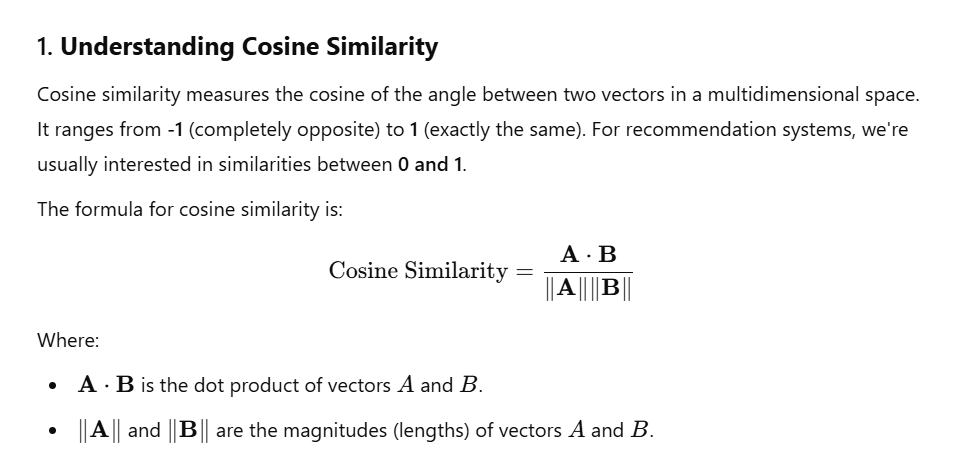

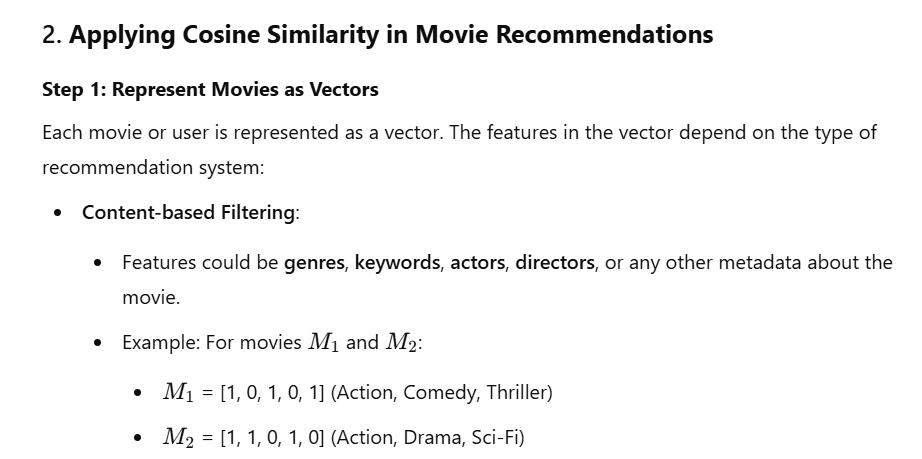

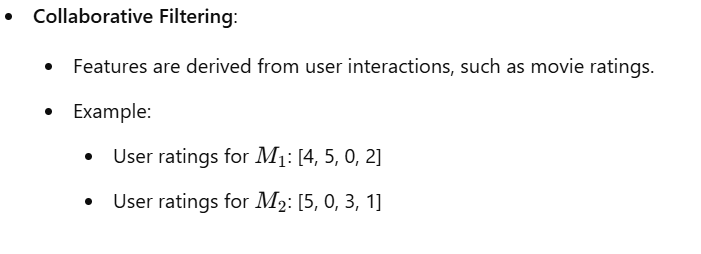

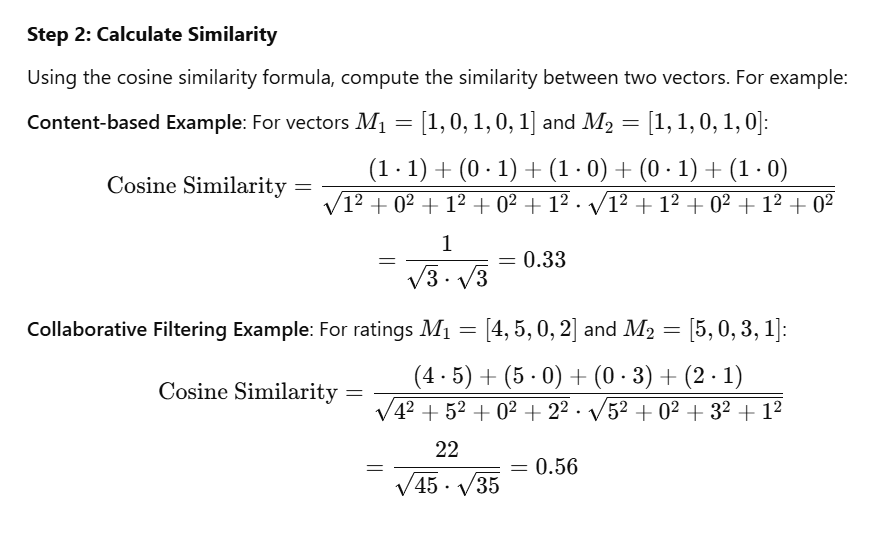

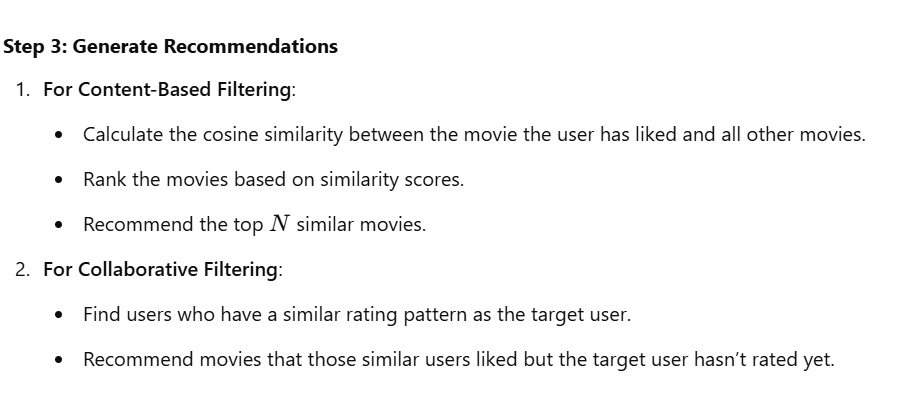

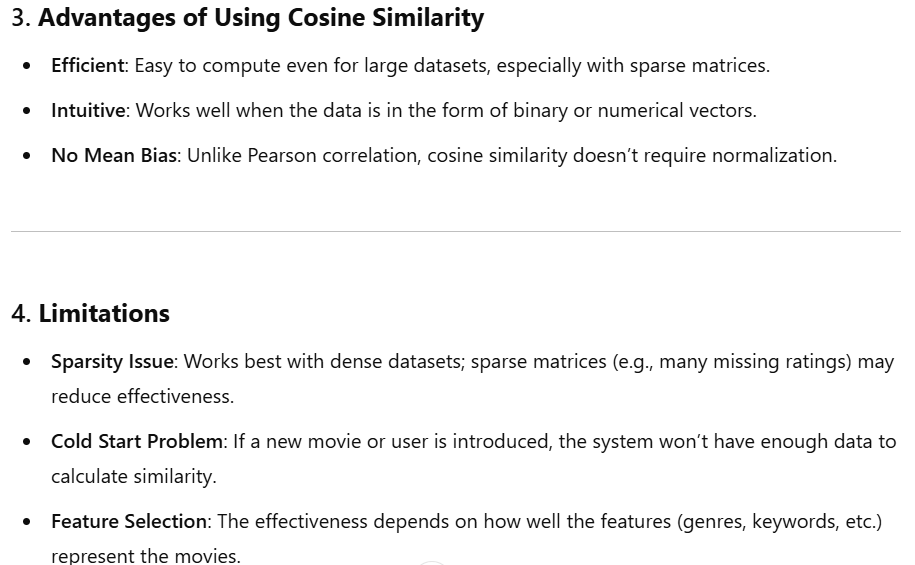

THANK YOU !!!

